In [19]:
# import h5py
import config
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import random
import time
import torch
import torch.nn as nn
import torch.nn.init as init
from torch.autograd import Variable
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve, roc_curve
import torch.nn.functional as F

In [41]:
pp = torch.randn((3, 4))
sft = nn.Softmax()
pp, np.exp(F.log_softmax(pp, dim=0)), np.exp(F.log_softmax(pp, dim=1)), sft(pp)

/home/subhankar/.conda/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  This is separate from the ipykernel package so we can avoid doing imports until


(tensor([[-0.3822,  0.3261, -2.1155, -2.3314],
         [-0.4916,  0.2681,  0.0885, -0.9978],
         [ 0.6638,  0.7717,  0.5916,  0.7421]]),
 tensor([[0.2109, 0.2853, 0.0399, 0.0379],
         [0.1890, 0.2692, 0.3618, 0.1437],
         [0.6001, 0.4455, 0.5983, 0.8185]]),
 tensor([[0.2985, 0.6062, 0.0528, 0.0425],
         [0.1809, 0.3868, 0.3232, 0.1091],
         [0.2424, 0.2700, 0.2255, 0.2621]]),
 tensor([[0.2985, 0.6062, 0.0528, 0.0425],
         [0.1809, 0.3868, 0.3232, 0.1091],
         [0.2424, 0.2700, 0.2255, 0.2621]]))

In [44]:
np.sum(np.array([[0.2985, 0.6062, 0.0528, 0.0425],
         [0.1809, 0.3868, 0.3232, 0.1091],
         [0.2424, 0.2700, 0.2255, 0.2621]]), axis=1)

array([0.7218, 1.263 , 0.6015, 0.4137])

In [5]:

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [8]:
nn = np.array([5,4,3,2,6,1])
nn[:-1]

array([5, 4, 3, 2, 6])

In [18]:
def accumulate_truth(iterable):
    true = 0
    false = 0
    for i in iterable:
        if i:
            true += 1
        else:
            false += 1
        yield true, false


def home_made_ROC(scores, targets):
    total_targets = sum(targets)
    length_sub_targets = len(targets) - total_targets

    scores, targets = zip(*sorted(zip(scores, targets), reverse=True))
    tprs = []
    fprs = []
    for true, false in accumulate_truth(targets):
        tprs.append(true / total_targets)
        fprs.append(false / length_sub_targets)

    return tprs, fprs

def auc(TPR, FPR):
    dFPR = np.zeros(len(FPR))
    dTPR = np.zeros(len(TPR))
    dFPR[:-1] = np.diff(FPR)
    dTPR[:-1] = np.diff(TPR)
    auc_val = np.sum(TPR * dFPR) + (np.sum(dTPR * dFPR)/2)
    if np.isnan(auc_val):
        return 0
    return auc_val

if __name__ == '__main__':
    tprs, fprs = home_made_ROC(np.array([0.1, 0.4, 0.35, 0.8]), np.array([0, 0, 0, 0]))
    print(tprs)
    print(fprs)
    print(auc(tprs, fprs))

[nan, nan, nan, nan]
[0.25, 0.5, 0.75, 1.0]
0


/home/subhankar/.conda/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars


In [30]:
folder = '../'
data_store = os.path.join(folder, 'Loan_Data_Test2.h5')
with pd.HDFStore(data_store) as hdf:
    ln = int(len(hdf.keys())/2)
    print(ln)
# check_set = set(['step_modification_flag_N', 'step_modification_flag_Y', 'super_conforming_flag_N', \
#                  'super_conforming_flag_Y', 'PPM_N', 'PPM_Y', 'occupancy_9', 'occupancy_S', 'occupancy_P', \
#                 'occupancy_I', 'first_time_9', 'first_time_N', 'first_time_Y', 'channel_B', 'channel_C',\
#                 'channel_R', 'channel_T', 'channel_9'])

# print("Reference columns = ", check_set)
# for t in range(0, ln):
#     df = pd.read_hdf(data_store, 'X_' + str(t))
#     if check_set.issubset(df.columns) == False:
#         print("Error not all present in ", t)
        
df = pd.read_hdf(data_store, 'X_' + str(t))
print(list(df.columns))

700
['credit_score', 'first_payment_date', 'mat_date', 'msa', 'mortgage_insurance', 'num_units', 'CLTV', 'DTI', 'UPB', 'LTV', 'original_interest_rate', 'state', 'postal_code', 'loan_number', 'original_loan_term', 'num_borrowers', 'first_time_9', 'first_time_N', 'first_time_Y', 'occupancy_I', 'occupancy_P', 'occupancy_S', 'channel_B', 'channel_C', 'channel_R', 'PPM_N', 'product_type_FRM', 'property_type_CO', 'property_type_CP', 'property_type_MH', 'property_type_PU', 'property_type_SF', 'purpose_C', 'purpose_N', 'purpose_P', 'seller_AMERIHOMEMTGECOMPANY', 'seller_BANKOFAMERICA,NA', 'seller_BRANCHBANKING&TRUSTC', 'seller_CALIBERHOMELOANS,INC', 'seller_CITIMORTGAGE,INC', 'seller_FAIRWAYINDEPENDENTMT', 'seller_FINANCEOFAMERICAMTGE', 'seller_FLAGSTARBANK,FSB', 'seller_FRANKLINAMERICANMTGE', 'seller_GUARANTEEDRATE,INC', 'seller_GUILDMTGECO', 'seller_JPMORGANCHASEBANK,NA', 'seller_LOANDEPOTCOM,LLC', 'seller_NATIONSTARMTGELLC', 'seller_Other sellers', 'seller_QUICKENLOANINC', 'seller_STEARNSLE

In [25]:
folder = '../'
data_store = os.path.join(folder, 'Loan_Data_Test2.h5')
t = 5
filter_state = True
df = pd.read_hdf(data_store, 'X_' + str(t))
lookup = pd.read_hdf(data_store, 'lookup_' + str(t))
df.loc[(df.zero_balance == 1) == True, 'current_status'] = '46'
df.current_UPB = pd.to_numeric(df['current_UPB'], errors='coerce')
df.mi_recovery = pd.to_numeric(df['mi_recovery'], errors='coerce')
df.non_mi_recovery = pd.to_numeric(df['non_mi_recovery'], errors='coerce')
df.net_sales_procedees = pd.to_numeric(df['net_sales_procedees'], errors='coerce')
df.modification_cost = pd.to_numeric(df['modification_cost'], errors='coerce')
df.remaining_month = pd.to_numeric(df['remaining_month'], errors='coerce')
df.current_status = df.current_status.astype('category', categories=config.unique_values['current_status'])
df.state = df.state.astype('category', categories=config.unique_values['unique_states'])
y = pd.get_dummies(df.current_status).values

/home/subhankar/.conda/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  
/home/subhankar/.conda/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  from ipykernel import kernelapp as app


In [40]:
ii = np.where(y[:, 0] == 1)[0]
ii = ii + 1
ii = ii[ii < df.shape[0]]
ii.shape, y[ii, :].shape, y.shape

((34010,), (34010, 46), (34390, 46))

In [20]:
ii = np.where(df.current_status == '0')[0]
ii = ii + 1
ii = ii[ii < df.shape[0]]

In [30]:
y[0].shape

(46,)

In [33]:
int(2.9)

2

In [ ]:
if filter_state:
    

y = pd.get_dummies(df.current_status).values
df = pd.get_dummies(df, columns=['state'])
X = df[config.column_list['select_columns']]
X = X.values
X[np.isnan(X)]=-1


Distribution of Loan lifetime

In [4]:
folder = '../'
data_store = os.path.join(folder, 'Loan_Data_Train5.h5')
with pd.HDFStore(data_store) as hdf:
    ln = int(len(hdf.keys())/2)
    print(ln)

time_len = dict()
    
for t in range(0, ln):
    lookup = pd.read_hdf(data_store, 'lookup_' + str(t)).values
    dif = lookup[:, 2] - lookup[:, 1]
    for d in dif:
        if d not in time_len:
            time_len[d] = 0
        time_len[d] += 1

2325


In [7]:
folder = '../'
data_store = os.path.join(folder, 'Loan_Data_Train5.h5')
with pd.HDFStore(data_store) as hdf:
    ln = int(len(hdf.keys())/2)
    print(ln)

time_len = dict()
prepay = 0
one = 0
current = 0
total = 0

for t in range(0, ln):
    df = pd.read_hdf(data_store, 'X_' + str(t))
    lookup = pd.read_hdf(data_store, 'lookup_' + str(t))
    
    total += lookup.shape[0]
    prepay += df.loc[(df.zero_balance == 1) == True, 'current_status'].shape[0]
    
    # df.loc[(df.zero_balance == 1) == True, 'current_status'] = '46'
    
    ii = np.where(df.loc[:, 'current_status'] == '0')[0]
    ii = ii + 1
    ii = ii[ii < df.shape[0]]
    df = df.loc[ii, :]
    
    current += df.shape[0]
    one += df.loc[(df.current_status == '1') == True, 'current_status'].shape[0]
    if (t%300) == 0:
        print(t, " done, ", one, prepay, current, total)


2325


/home/subhankar/.conda/envs/pytorch/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


0  done,  3470 2479 142055 3011
300  done,  1196168 749107 49882271 945245
600  done,  1631310 1096507 85869065 1935010
900  done,  2043319 1503152 120468426 2956953
1200  done,  2634245 2142386 150779630 3738346
1500  done,  2705709 2492769 175224668 4393794
1800  done,  2939165 3318474 234890791 5696585
2100  done,  3219381 4253480 294207201 7008274


In [20]:
one, prepay, current, total

(3330590, 4661120, 321373698, 7640021)

Text(0, 0.5, 'count')

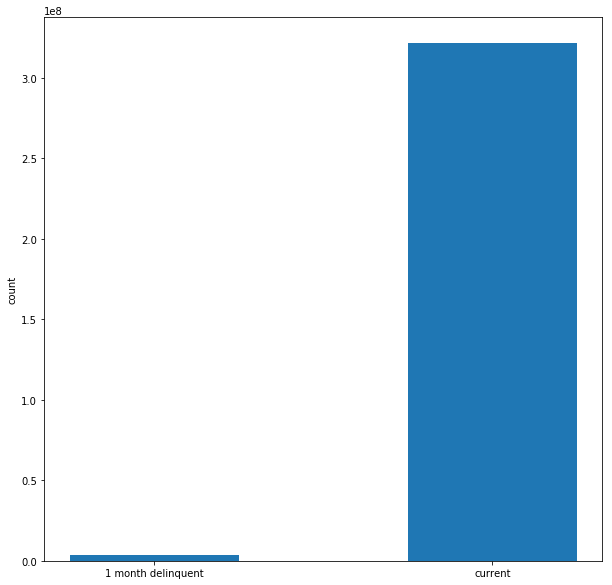

In [25]:
plt.figure(figsize=(10,10))
plt.bar(['1 month delinquent', 'current'], [one, current], width=0.5)
plt.ylabel('count')

Text(0, 0.5, 'count')

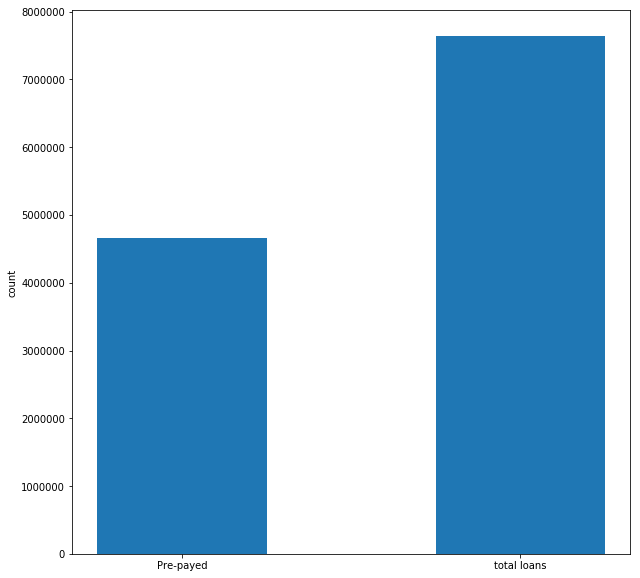

In [24]:
plt.figure(figsize=(10,10))
plt.bar(['Pre-payed', 'total loans'], [prepay, total], width=0.5)
plt.ylabel('count')


In [9]:
sorted_by_value = dict(sorted(time_len.items(), key=lambda kv: kv[1]))

In [14]:
life_time, freq = list(sorted_by_value.keys()), list(sorted_by_value.values())

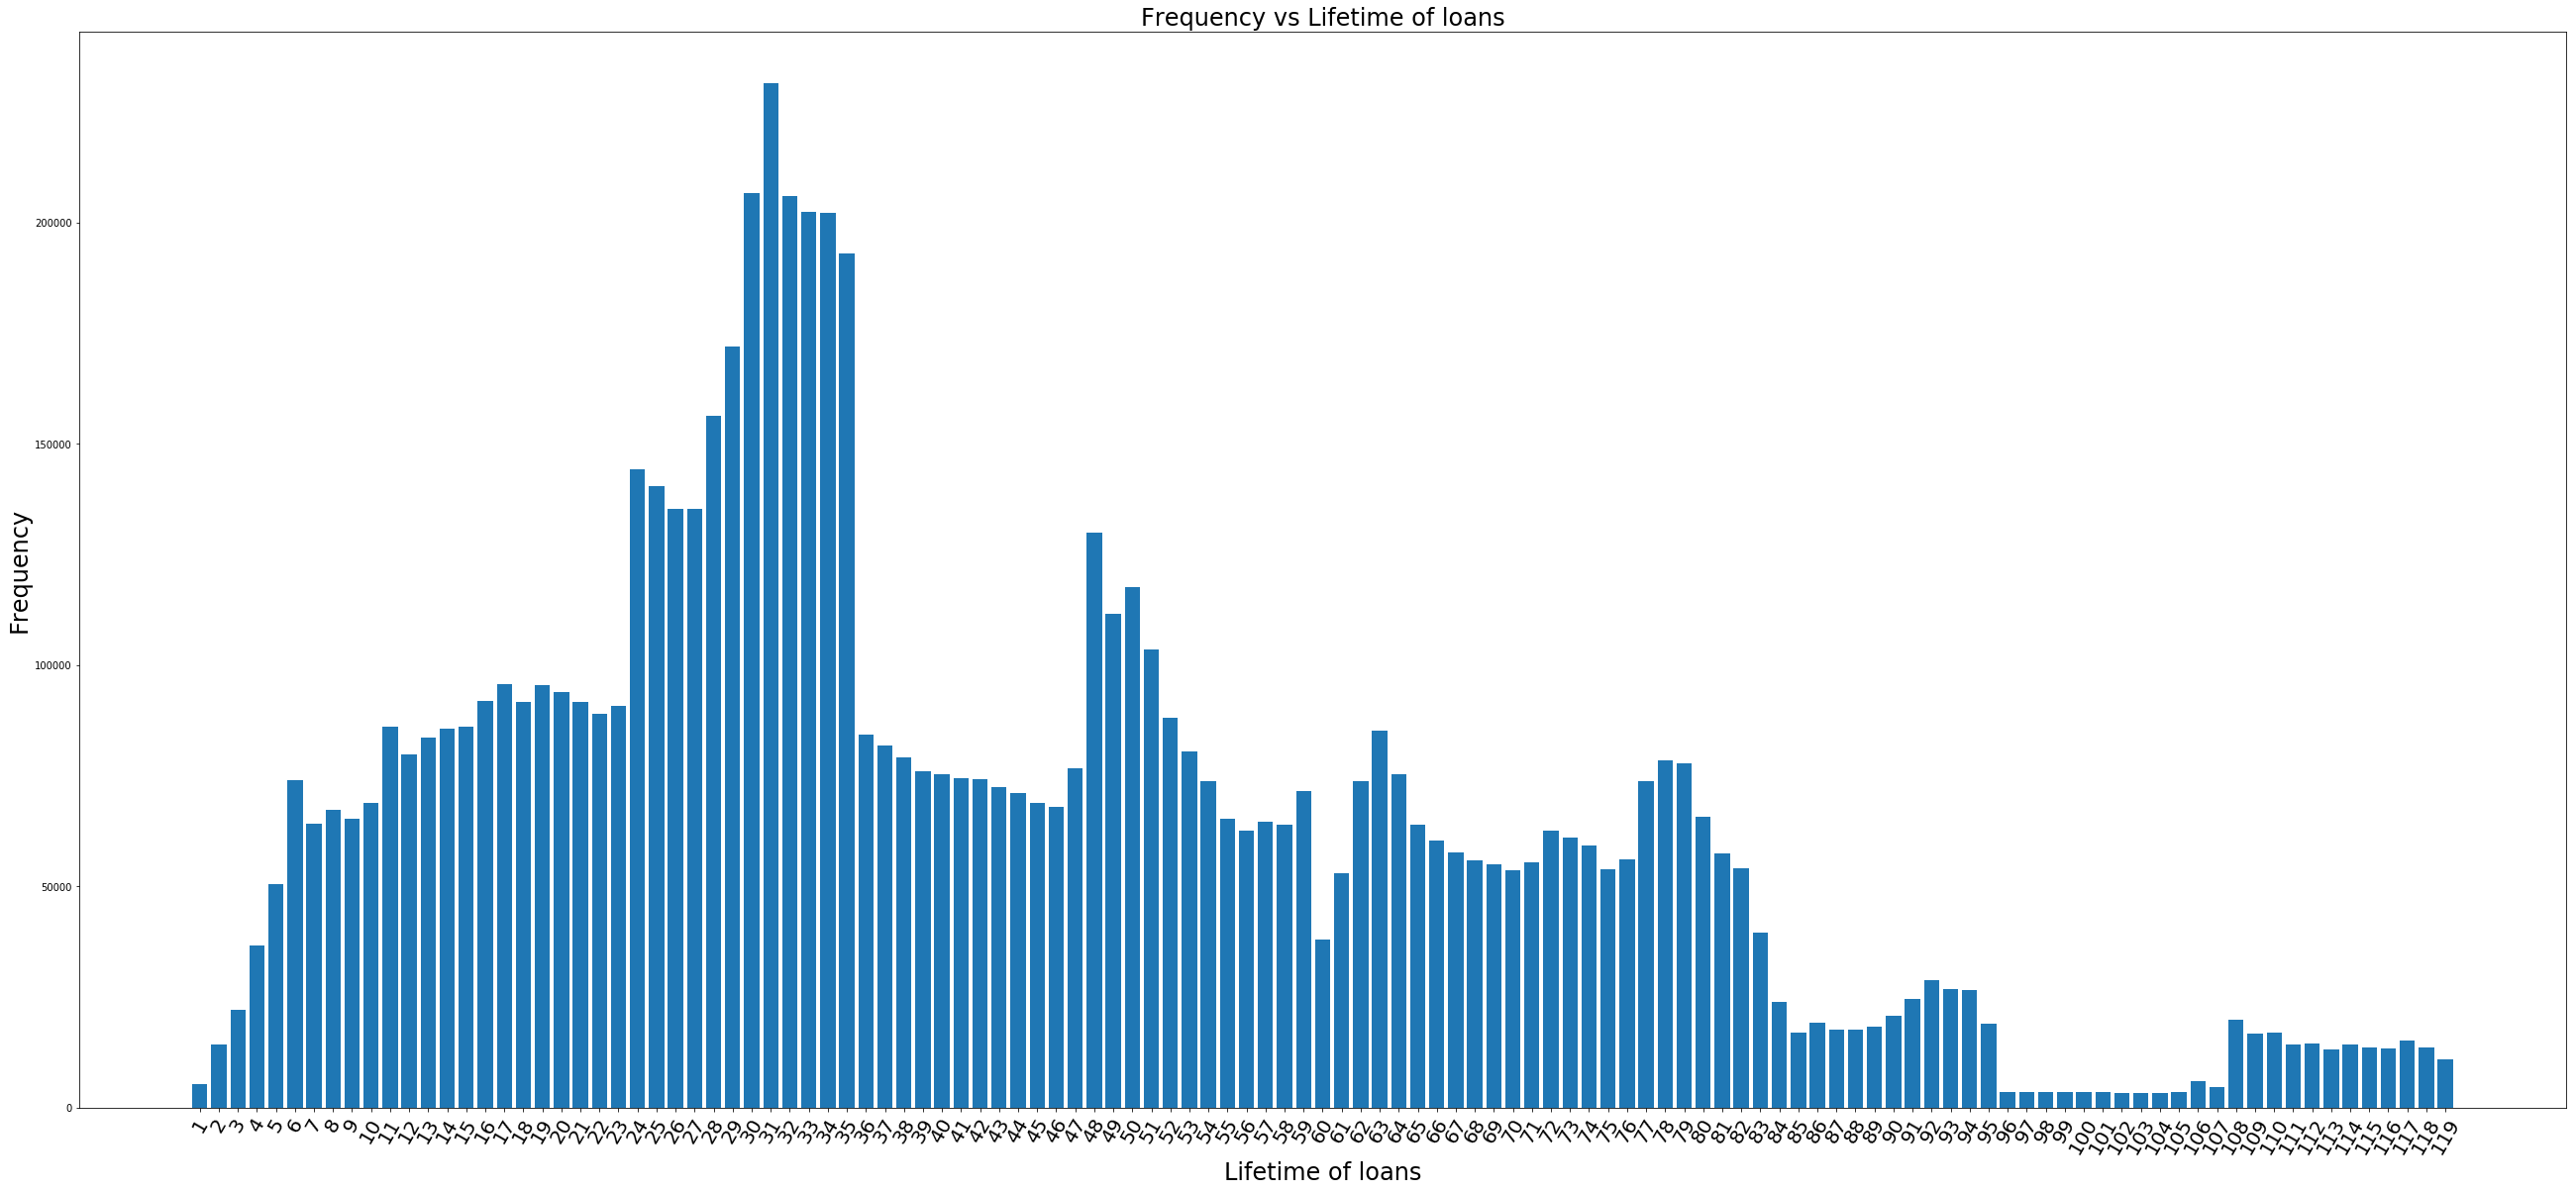

In [38]:
plt.figure(figsize=(45,20))
plt.bar(life_time, freq)
plt.xticks(life_time, rotation=60, fontsize=20)
plt.xlabel('Lifetime of loans', fontsize=24)
plt.ylabel('Frequency', fontsize=24)
plt.title('Frequency vs Lifetime of loans', fontsize=24)
plt.show()

In [34]:
folder = '../'
data_store = os.path.join(folder, 'Loan_Data_Test5.h5')
with pd.HDFStore(data_store) as hdf:
    ln = int(len(hdf.keys())/2)
    print(ln)
check_set = set(['step_modification_flag_N', 'step_modification_flag_Y', 'super_conforming_flag_N', \
                 'super_conforming_flag_Y', 'PPM_N', 'PPM_Y', 'occupancy_9', 'occupancy_S', 'occupancy_P', \
                'occupancy_I', 'first_time_9', 'first_time_N', 'first_time_Y', 'channel_B', 'channel_C',\
                'channel_R', 'channel_T', 'channel_9'])

print("Reference columns = ", check_set)
for t in range(0, ln):
    df = pd.read_hdf(data_store, 'X_' + str(t))
    if check_set.issubset(df.columns) == False:
        print("Error not all present in ", t)

700
Reference columns =  {'first_time_9', 'channel_T', 'channel_B', 'occupancy_S', 'PPM_N', 'channel_9', 'occupancy_P', 'occupancy_9', 'PPM_Y', 'step_modification_flag_N', 'step_modification_flag_Y', 'occupancy_I', 'first_time_N', 'first_time_Y', 'channel_C', 'channel_R', 'super_conforming_flag_N', 'super_conforming_flag_Y'}


In [28]:
folder = '../'
data_store = os.path.join(folder, 'Loan_Data_Train5.h5')
with pd.HDFStore(data_store) as hdf:
    ln = int(len(hdf.keys())/2)
    print(ln)
check_set = set(['step_modification_flag_N', 'step_modification_flag_Y', 'super_conforming_flag_N', \
                 'super_conforming_flag_Y', 'PPM_N', 'PPM_Y', 'occupancy_9', 'occupancy_S', 'occupancy_P', \
                'occupancy_I', 'first_time_9', 'first_time_N', 'first_time_Y', 'channel_B', 'channel_C',\
                'channel_R', 'channel_T', 'channel_9'])

print("Reference columns = ", check_set)
for t in range(0, ln):
    df = pd.read_hdf(data_store, 'X_' + str(t))
    if check_set.issubset(df.columns) == False:
        print("Error not all present in ", t)

2325
Reference columns =  {'PPM_Y', 'first_time_9', 'PPM_N', 'channel_C', 'occupancy_I', 'first_time_Y', 'super_conforming_flag_N', 'step_modification_flag_Y', 'channel_B', 'channel_R', 'occupancy_P', 'first_time_N', 'super_conforming_flag_Y', 'occupancy_9', 'occupancy_S', 'channel_T', 'channel_9', 'step_modification_flag_N'}


In [7]:
folder = '../'
data_store = os.path.join(folder, 'Loan_Data_Train5.h5')
with pd.HDFStore(data_store) as hdf:
    ln = int(len(hdf.keys())/2)
    print(ln)

df = pd.read_hdf(data_store, 'X_' + str(0))
col = df.shape[1]
print("starting number of columns = ", col)
for t in range(1, ln):
    df = pd.read_hdf(data_store, 'X_' + str(t))
    if col != df.shape[1]:
        print("Error df number = ", t, " number of columns = ", df.shape[1])

2325
starting number of columns =  104
Error df number =  100  number of columns =  100
Error df number =  101  number of columns =  100
Error df number =  102  number of columns =  100
Error df number =  103  number of columns =  100
Error df number =  104  number of columns =  100
Error df number =  105  number of columns =  100
Error df number =  106  number of columns =  100
Error df number =  107  number of columns =  100
Error df number =  108  number of columns =  100
Error df number =  109  number of columns =  100
Error df number =  110  number of columns =  100
Error df number =  111  number of columns =  100
Error df number =  112  number of columns =  100
Error df number =  113  number of columns =  100
Error df number =  114  number of columns =  100
Error df number =  115  number of columns =  100
Error df number =  116  number of columns =  100
Error df number =  117  number of columns =  100
Error df number =  118  number of columns =  100
Error df number =  119  number

Error df number =  267  number of columns =  100
Error df number =  268  number of columns =  100
Error df number =  269  number of columns =  100
Error df number =  270  number of columns =  100
Error df number =  271  number of columns =  100
Error df number =  272  number of columns =  100
Error df number =  273  number of columns =  100
Error df number =  274  number of columns =  100
Error df number =  275  number of columns =  100
Error df number =  276  number of columns =  100
Error df number =  277  number of columns =  100
Error df number =  278  number of columns =  100
Error df number =  279  number of columns =  100
Error df number =  280  number of columns =  100
Error df number =  281  number of columns =  100
Error df number =  282  number of columns =  100
Error df number =  283  number of columns =  100
Error df number =  284  number of columns =  100
Error df number =  285  number of columns =  100
Error df number =  286  number of columns =  100
Error df number =  2

Error df number =  435  number of columns =  106
Error df number =  436  number of columns =  106
Error df number =  437  number of columns =  106
Error df number =  438  number of columns =  106
Error df number =  439  number of columns =  106
Error df number =  440  number of columns =  106
Error df number =  441  number of columns =  106
Error df number =  442  number of columns =  106
Error df number =  443  number of columns =  106
Error df number =  444  number of columns =  106
Error df number =  445  number of columns =  106
Error df number =  446  number of columns =  106
Error df number =  447  number of columns =  106
Error df number =  448  number of columns =  106
Error df number =  449  number of columns =  106
Error df number =  450  number of columns =  106
Error df number =  451  number of columns =  106
Error df number =  452  number of columns =  106
Error df number =  453  number of columns =  106
Error df number =  454  number of columns =  106
Error df number =  4

Error df number =  603  number of columns =  116
Error df number =  604  number of columns =  116
Error df number =  605  number of columns =  116
Error df number =  606  number of columns =  116
Error df number =  607  number of columns =  116
Error df number =  608  number of columns =  116
Error df number =  609  number of columns =  116
Error df number =  610  number of columns =  116
Error df number =  611  number of columns =  116
Error df number =  612  number of columns =  116
Error df number =  613  number of columns =  116
Error df number =  614  number of columns =  116
Error df number =  615  number of columns =  116
Error df number =  616  number of columns =  116
Error df number =  617  number of columns =  116
Error df number =  618  number of columns =  116
Error df number =  619  number of columns =  116
Error df number =  620  number of columns =  116
Error df number =  621  number of columns =  116
Error df number =  622  number of columns =  116
Error df number =  6

Error df number =  771  number of columns =  108
Error df number =  772  number of columns =  108
Error df number =  773  number of columns =  108
Error df number =  774  number of columns =  108
Error df number =  775  number of columns =  108
Error df number =  776  number of columns =  108
Error df number =  777  number of columns =  108
Error df number =  778  number of columns =  108
Error df number =  779  number of columns =  108
Error df number =  780  number of columns =  108
Error df number =  781  number of columns =  108
Error df number =  782  number of columns =  108
Error df number =  783  number of columns =  108
Error df number =  784  number of columns =  108
Error df number =  785  number of columns =  108
Error df number =  786  number of columns =  108
Error df number =  787  number of columns =  108
Error df number =  788  number of columns =  108
Error df number =  789  number of columns =  108
Error df number =  790  number of columns =  108
Error df number =  7

Error df number =  939  number of columns =  99
Error df number =  940  number of columns =  99
Error df number =  941  number of columns =  99
Error df number =  942  number of columns =  99
Error df number =  943  number of columns =  99
Error df number =  944  number of columns =  99
Error df number =  945  number of columns =  99
Error df number =  946  number of columns =  99
Error df number =  947  number of columns =  99
Error df number =  948  number of columns =  99
Error df number =  949  number of columns =  99
Error df number =  950  number of columns =  99
Error df number =  951  number of columns =  99
Error df number =  952  number of columns =  99
Error df number =  953  number of columns =  99
Error df number =  954  number of columns =  99
Error df number =  955  number of columns =  99
Error df number =  956  number of columns =  99
Error df number =  957  number of columns =  99
Error df number =  958  number of columns =  99
Error df number =  959  number of column

Error df number =  1106  number of columns =  102
Error df number =  1107  number of columns =  102
Error df number =  1108  number of columns =  102
Error df number =  1109  number of columns =  102
Error df number =  1110  number of columns =  102
Error df number =  1111  number of columns =  102
Error df number =  1112  number of columns =  102
Error df number =  1113  number of columns =  102
Error df number =  1114  number of columns =  102
Error df number =  1115  number of columns =  102
Error df number =  1116  number of columns =  102
Error df number =  1117  number of columns =  102
Error df number =  1118  number of columns =  102
Error df number =  1119  number of columns =  102
Error df number =  1120  number of columns =  102
Error df number =  1121  number of columns =  102
Error df number =  1122  number of columns =  102
Error df number =  1123  number of columns =  102
Error df number =  1124  number of columns =  102
Error df number =  1125  number of columns =  102


Error df number =  1272  number of columns =  99
Error df number =  1273  number of columns =  99
Error df number =  1274  number of columns =  99
Error df number =  1275  number of columns =  99
Error df number =  1276  number of columns =  99
Error df number =  1277  number of columns =  99
Error df number =  1278  number of columns =  99
Error df number =  1279  number of columns =  99
Error df number =  1280  number of columns =  99
Error df number =  1281  number of columns =  99
Error df number =  1282  number of columns =  99
Error df number =  1283  number of columns =  99
Error df number =  1284  number of columns =  99
Error df number =  1285  number of columns =  99
Error df number =  1286  number of columns =  99
Error df number =  1287  number of columns =  99
Error df number =  1288  number of columns =  99
Error df number =  1289  number of columns =  99
Error df number =  1290  number of columns =  99
Error df number =  1291  number of columns =  99
Error df number =  1

Error df number =  1439  number of columns =  102
Error df number =  1440  number of columns =  102
Error df number =  1441  number of columns =  102
Error df number =  1442  number of columns =  102
Error df number =  1443  number of columns =  102
Error df number =  1444  number of columns =  102
Error df number =  1445  number of columns =  102
Error df number =  1446  number of columns =  102
Error df number =  1447  number of columns =  102
Error df number =  1448  number of columns =  102
Error df number =  1449  number of columns =  102
Error df number =  1450  number of columns =  102
Error df number =  1451  number of columns =  102
Error df number =  1452  number of columns =  102
Error df number =  1453  number of columns =  102
Error df number =  1454  number of columns =  102
Error df number =  1455  number of columns =  102
Error df number =  1456  number of columns =  102
Error df number =  1457  number of columns =  102
Error df number =  1458  number of columns =  102


Error df number =  1603  number of columns =  97
Error df number =  1604  number of columns =  97
Error df number =  1605  number of columns =  97
Error df number =  1606  number of columns =  97
Error df number =  1607  number of columns =  97
Error df number =  1608  number of columns =  97
Error df number =  1609  number of columns =  97
Error df number =  1610  number of columns =  97
Error df number =  1611  number of columns =  97
Error df number =  1612  number of columns =  97
Error df number =  1613  number of columns =  97
Error df number =  1614  number of columns =  97
Error df number =  1615  number of columns =  97
Error df number =  1616  number of columns =  97
Error df number =  1617  number of columns =  97
Error df number =  1618  number of columns =  97
Error df number =  1619  number of columns =  97
Error df number =  1620  number of columns =  97
Error df number =  1621  number of columns =  97
Error df number =  1622  number of columns =  97
Error df number =  1

Error df number =  1771  number of columns =  99
Error df number =  1772  number of columns =  99
Error df number =  1773  number of columns =  99
Error df number =  1774  number of columns =  99
Error df number =  1775  number of columns =  99
Error df number =  1776  number of columns =  99
Error df number =  1777  number of columns =  99
Error df number =  1778  number of columns =  99
Error df number =  1779  number of columns =  99
Error df number =  1780  number of columns =  99
Error df number =  1781  number of columns =  99
Error df number =  1782  number of columns =  99
Error df number =  1783  number of columns =  99
Error df number =  1784  number of columns =  99
Error df number =  1785  number of columns =  99
Error df number =  1786  number of columns =  99
Error df number =  1787  number of columns =  99
Error df number =  1788  number of columns =  99
Error df number =  1789  number of columns =  99
Error df number =  1790  number of columns =  99
Error df number =  1

Error df number =  1938  number of columns =  102
Error df number =  1939  number of columns =  102
Error df number =  1940  number of columns =  102
Error df number =  1941  number of columns =  102
Error df number =  1942  number of columns =  102
Error df number =  1943  number of columns =  102
Error df number =  1944  number of columns =  102
Error df number =  1945  number of columns =  102
Error df number =  1946  number of columns =  102
Error df number =  1947  number of columns =  102
Error df number =  1948  number of columns =  102
Error df number =  1949  number of columns =  102
Error df number =  1950  number of columns =  102
Error df number =  1951  number of columns =  102
Error df number =  1952  number of columns =  102
Error df number =  1953  number of columns =  102
Error df number =  1954  number of columns =  102
Error df number =  1955  number of columns =  102
Error df number =  1956  number of columns =  102
Error df number =  1957  number of columns =  102


Error df number =  2104  number of columns =  100
Error df number =  2105  number of columns =  100
Error df number =  2106  number of columns =  100
Error df number =  2107  number of columns =  100
Error df number =  2108  number of columns =  100
Error df number =  2109  number of columns =  100
Error df number =  2110  number of columns =  100
Error df number =  2111  number of columns =  100
Error df number =  2112  number of columns =  100
Error df number =  2113  number of columns =  100
Error df number =  2114  number of columns =  100
Error df number =  2115  number of columns =  100
Error df number =  2116  number of columns =  100
Error df number =  2117  number of columns =  100
Error df number =  2118  number of columns =  100
Error df number =  2119  number of columns =  100
Error df number =  2120  number of columns =  100
Error df number =  2121  number of columns =  100
Error df number =  2122  number of columns =  100
Error df number =  2123  number of columns =  100


Error df number =  2268  number of columns =  100
Error df number =  2269  number of columns =  100
Error df number =  2270  number of columns =  100
Error df number =  2271  number of columns =  100
Error df number =  2272  number of columns =  100
Error df number =  2273  number of columns =  100
Error df number =  2274  number of columns =  100
Error df number =  2275  number of columns =  100
Error df number =  2276  number of columns =  100
Error df number =  2277  number of columns =  100
Error df number =  2278  number of columns =  100
Error df number =  2279  number of columns =  100
Error df number =  2280  number of columns =  100
Error df number =  2281  number of columns =  100
Error df number =  2282  number of columns =  100
Error df number =  2283  number of columns =  100
Error df number =  2284  number of columns =  100
Error df number =  2285  number of columns =  100
Error df number =  2286  number of columns =  100
Error df number =  2287  number of columns =  100


In [27]:
folder = '../'
data_store = os.path.join(folder, 'Loan_Data_Train5.h5')
df = pd.read_hdf(data_store, 'X_' + str(0)) # 104
print(list(df.columns))
df = pd.read_hdf(data_store, 'X_' + str(2301))
print(list(df.columns))

['credit_score', 'first_payment_date', 'mat_date', 'msa', 'mortgage_insurance', 'num_units', 'CLTV', 'DTI', 'UPB', 'LTV', 'original_interest_rate', 'state', 'postal_code', 'loan_number', 'original_loan_term', 'num_borrowers', 'first_time_Y', 'first_time_N', 'first_time_9', 'occupancy_P', 'occupancy_I', 'occupancy_S', 'occupancy_9', 'channel_R', 'channel_B', 'channel_C', 'channel_T', 'channel_9', 'PPM_Y', 'PPM_N', 'product_type_FRM', 'property_type_CO', 'property_type_CP', 'property_type_MH', 'property_type_PU', 'property_type_SF', 'purpose_C', 'purpose_N', 'purpose_P', 'seller_ABNAMROMTGEGROUP,INC', 'seller_BANKOFAMERICA,NA', 'seller_BRANCHBANKING&TRUSTC', 'seller_CHASEHOMEFINANCELLC', 'seller_CITIMORTGAGE,INC', 'seller_COUNTRYWIDE', 'seller_FIFTHTHIRDBANK', 'seller_FLAGSTARCAPITALMARKE', 'seller_GMACMTGECORP', 'seller_Other sellers', 'seller_PROVIDENTFUNDINGASSO', 'seller_SOVEREIGNBANK', 'seller_SUNTRUSTMORTGAGE,INC', 'seller_TAYLOR,BEAN&WHITAKER', 'seller_USBANKNA', 'seller_WASHINGTO

In [21]:
list(cols06)

['credit_score',
 'first_payment_date',
 'mat_date',
 'msa',
 'mortgage_insurance',
 'num_units',
 'CLTV',
 'DTI',
 'UPB',
 'LTV',
 'original_interest_rate',
 'state',
 'postal_code',
 'loan_number',
 'original_loan_term',
 'num_borrowers',
 'first_time_9',
 'first_time_N',
 'first_time_Y',
 'occupancy_I',
 'occupancy_P',
 'occupancy_S',
 'channel_B',
 'channel_C',
 'channel_R',
 'channel_T',
 'PPM_N',
 'PPM_Y',
 'product_type_FRM',
 'property_type_CO',
 'property_type_CP',
 'property_type_MH',
 'property_type_PU',
 'property_type_SF',
 'purpose_C',
 'purpose_N',
 'purpose_P',
 'seller_ABNAMROMTGEGROUP,INC',
 'seller_BANKOFAMERICA,NA',
 'seller_BRANCHBANKING&TRUSTC',
 'seller_CHASEHOMEFINANCELLC',
 'seller_CITIMORTGAGE,INC',
 'seller_COUNTRYWIDE',
 'seller_FIFTHTHIRDBANK',
 'seller_FLAGSTARCAPITALMARKE',
 'seller_GMACMTGECORP',
 'seller_Other sellers',
 'seller_PROVIDENTFUNDINGASSO',
 'seller_SOVEREIGNBANK',
 'seller_SUNTRUSTMORTGAGE,INC',
 'seller_TAYLOR,BEAN&WHITAKER',
 'seller_USBAN

In [17]:
set(cols12) - set(cols06), set(cols06) - set(cols12) 

({'seller_CALIBERHOMELOANS,INC',
  'seller_CHICAGOMTGESOLUTIONS',
  'seller_CMGMORTGAGE,INC',
  'seller_COLETAYLORBANK',
  'seller_FLAGSTARBANK,FSB',
  'seller_FRANKLINAMERICANMTGE',
  'seller_GUARANTEEDRATE,INC',
  'seller_JPMORGANCHASEBANK,NA',
  'seller_LOANDEPOTCOM,LLC',
  'seller_PENNYMACCORP',
  'seller_PHHMTGECORP',
  'seller_QUICKENLOANINC',
  'seller_STEARNSLENDING,INC',
  'seller_STONEGATEMTGECORP',
  'seller_UNITEDSHOREFINANCIAL',
  'servicer_CALIBERHOMELOANS,INC',
  'servicer_DITECHFINANCIALLLC',
  'servicer_FIFTHTHIRDMTGECO',
  'servicer_LAKEVIEWLOANSERVICIN',
  'servicer_NEWRESIDENTIALMTGELL',
  'servicer_PENNYMACCORP',
  'servicer_PINGORALOANSERVICING',
  'servicer_PNCBANK,NATL',
  'servicer_QUICKENLOANINC',
  'servicer_SENECAMTGESERVICING,',
  'servicer_STEARNSLENDING,LLC',
  'servicer_SUNTRUSTMORTGAGE,INC',
  'super_conforming_flag_Y'},
 {'PPM_Y',
  'channel_T',
  'seller_ABNAMROMTGEGROUP,INC',
  'seller_CHASEHOMEFINANCELLC',
  'seller_COUNTRYWIDE',
  'seller_FLAGSTARC

In [3]:
folder = '../'

def PrepareTrainTestset(self):
    with pd.HDFStore(data_store) as hdf:
        ln = int(len(hdf.keys())/2)
    max_loan_duration = -1
    data_store = os.path.join(folder, 'Loan_Data.h5')
    hdf_file_test = os.path.join(folder, 'Loan_Data_test.h5')

    for t in range(ln):
        df = pd.read_hdf(data_store, 'X_' + str(t))
        lookup = pd.read_hdf(data_store, 'lookup_' + str(t))

        df16 = df.loc[(df.first_payment_date/100).astype(int) == 2016, :]
        df17 = df.loc[(df.first_payment_date/100).astype(int) == 2017, :]
        if df16.shape[0] > 0:
            df16.to_hdf(hdf_file_test, key='X_'+str(j), format='t', complevel=9)
            lookup.to_hdf(hdf_file_test, key='lookup_'+str(j), format='t', complevel=9)
            continue

        if df17.shape[0] > 0:
            df17.to_hdf(hdf_file_test, key='X_'+str(j), format='t', complevel=9)
            lookup.to_hdf(hdf_file_test, key='lookup_'+str(j), format='t', complevel=9)
            continue

        df = df.loc[(df.first_payment_date/100).astype(int) < 2016, :]
        lookup = df[['loan_number']].groupby(['loan_number']).size().reset_index(name='counts')
        lookup_table = []
        curr = 0
        for ind, r in lookup.iterrows():
            lookup_table.append((r[0], curr, curr+r[1]))
            curr = curr+r[1]
            max_loan_duration = max(max_loan_duration, r[1])
        lookup_table = pd.DataFrame(lookup_table)
        # Save as .h5
        df.to_hdf(os.path.join(self.rootDir, 'Loan_Data_16.h5'), key='X_'+str(index), format='t', complevel=9)
        lookup_table.to_hdf(os.path.join(self.rootDir, 'Loan_Data_16.h5'), key='lookup_'+str(index), format='t', complevel=9)

In [20]:
def CheckLoanEnd(t, file_path):
    df = pd.read_hdf(file_path, 'X_' + str(t))
    lookup = pd.read_hdf(file_path, 'lookup_' + str(t))
    max_rows = df.shape[0]
    indices = list(df.loc[(df.zero_balance == 1) == True].index)
    count=0
    for ind in indices:
        curr = df.iloc[ind]['loan_number']
        if ind == (max_rows - 1):
            continue
        nxt = df.iloc[ind+1]['loan_number']
        if curr == nxt:
            count+=1
    return (lookup.shape[0], len(indices), count)

In [21]:
cnt=0
tot=0
elig=0
for t in train:
    total, eligible, curr_cnt = CheckLoanEnd(t, hdf_file_path)
    tot+=total
    cnt+=curr_cnt
    elig+=eligible
print('train over')
for t in test:
    total, eligible, curr_cnt = CheckLoanEnd(t, hdf_file_path)
    tot+=total
    cnt+=curr_cnt
    elig+=eligible
print('test over')
for t in valid:
    total, eligible, curr_cnt = CheckLoanEnd(t, hdf_file_path)
    tot+=total
    cnt+=curr_cnt
    elig+=eligible
print('Valid over')
print('Total matching: ', elig)
print('Total: ', tot)
print('Error count: ', cnt)

train over
test over
Valid over
Total matching:  0
Total:  2278029
Error count:  0


In [23]:
print('Total matching: ', elig)
print('Total: ', tot)
print('Error count: ', cnt)

Total matching:  633456
Total:  2278029
Error count:  0


In [6]:

df = pd.read_hdf(hdf_file_path, 'X_' + str(1))

In [15]:
df.loc[(df.zero_balance == 1) == True, 'current_status'] = '46'

In [23]:
store = pd.HDFStore(hdf_file_path, 'r')
print(len(store.keys())/2)
store.close()

1635.0


In [20]:
j = 800
st = time.time()
for i in range(1600, 2435):
    df = pd.read_hdf(hdf_file_path2, 'X_' + str(i))
    lookup = pd.read_hdf(hdf_file_path2, 'lookup_' + str(i))
    
    df.to_hdf(hdf_file_path, key='X_'+str(j), format='t', complevel=9)
    lookup.to_hdf(hdf_file_path, key='lookup_'+str(j), format='t', complevel=9)
    j += 1
en = time.time()
print(en - st)

3734.8686645030975


In [2]:
import config

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
np.set_printoptions(threshold=np.inf, suppress=False, floatmode='fixed')
torch.set_printoptions(threshold=5000)

In [3]:
folder = '../Data/'
hdf_file_path = os.path.join(folder, 'Loan_Data.h5')
hdf_file_path2 = os.path.join(folder, 'Loan_Data_2.h5')
hdf_path_balanced = os.path.join(folder, 'Loan_Data_balanced.h5')

In [13]:
# hdf_file_path: Loan_Data
key_len = 1600
random.seed = 448
rand_ind = random.sample([i for i in range(int(key_len/2))], int(key_len/2))

train_lim = int(0.7*int(key_len/2))
test_lim = train_lim + int(0.25*int(key_len/2))
valid_lim = test_lim + int((1 - train_lim - test_lim)*int(key_len/2))
train, test, valid = rand_ind[:train_lim], rand_ind[train_lim: test_lim], rand_ind[test_lim:]

In [ ]:
# hdf_path_balanced: Loan_Data_balanced
key_len = 38
random.seed = 448
rand_ind = random.sample([i for i in range(int(key_len/2))], int(key_len/2))

train_lim = int(0.8*int(key_len/2))
test_lim = train_lim + int(0.15*int(key_len/2))
valid_lim = test_lim + int((1 - train_lim - test_lim)*int(key_len/2))
train, test, valid = rand_ind[:train_lim], rand_ind[train_lim: test_lim], rand_ind[test_lim:]

In [ ]:
print(train[:5])
print(test[:5])
print(valid[:5])

In [ ]:
print(len(train))
print(len(test))
print(len(valid))

In [6]:
def PrintMatrix(d):
    plt.imshow(d, extent=[0, 47, 0, 47], cmap='jet')
    plt.yticks()
    plt.xticks()
    plt.colorbar()
    plt.show()

In [7]:
# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        init.xavier_normal(self.linear.weight)
        self.softmax = nn.Softmax()
    
    def forward(self, x):
        out = self.linear(x)
        # print(self.linear.weight)
        # out = self.softmax(out)
        # print (out)
        return out

In [8]:
# Model
class FeedForward(nn.Module):
    def __init__(self, input_size, hidden_layer, num_classes):
        super(FeedForward, self).__init__()
        self.num_classes = num_classes
        self.fc1 = nn.Linear(input_size, hidden_layer1)
        init.xavier_normal_(self.fc1.weight)
        self.bn1 = nn.BatchNorm1d(num_features=hidden_layer1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        init.xavier_normal_(self.fc2.weight)
        self.bn2 = nn.BatchNorm1d(num_features=hidden_layer2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_layer2, num_classes)
        init.xavier_normal_(self.fc3.weight)
        self.bn3 = nn.BatchNorm1d(num_features=num_classes)
        self.softmax = nn.Softmax()
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.bn2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.bn3(out)
        # PrintMatrix(out.data.cpu().numpy())
        # print(out.view(-1, self.num_classes))
        # out = self.softmax(out)
        return out

In [9]:
def DataCreator(t, file_path):
    df = pd.read_hdf(file_path, 'X_' + str(t))
    lookup = pd.read_hdf(file_path, 'lookup_' + str(t))
    df.loc[(df.zero_balance == 1) == True, 'current_status'] = '46'
    df.current_status = df.current_status.astype('category', categories=config.unique_values['current_status'])
    # df.loc[df.current_status != '1', 'current_status'] = '0'
    # df.current_status = df.current_status.astype('category', categories=['0', '1'])
    df.state = df.state.astype('category', categories=config.unique_values['unique_states'])
    y = pd.get_dummies(df.current_status).values
    df = pd.get_dummies(df, columns=['state'])
    X = df[config.column_list['select_columns']].values
    X[np.isnan(X)]=-1
    return (X, y)

In [10]:
def GetAUCScore(y_actual, predicted_score, concerned_class):
    ### y_actual: one hot encoding of all classes. np array of shape n x num_of_classes
    ### predicted_score: np array of shape n x num_of_classes containing probabilities
    ### PrintMatrix(predicted_score)
    # print(np.min(predicted_score), np.max(predicted_score))
    try:
#         print(predicted_score[:100, 0])
#         print('#################################')
#         print('########## class 0 #################')
#         print('#################################')
        predicted_score = predicted_score[:, concerned_class]
        y_actual = y_actual[:, concerned_class]
        print(roc_auc_score(y_actual, predicted_score), y_actual[y_actual == 1].shape, y_actual.shape)
#         print(y_actual[:100])
#         print('#################################')
#         print('########### actual class 1 ###############')
#         print('#################################')
#         print(predicted_score[:100,])
#         print('#################################')
#         print('############ class 1 ############')
#         print('#################################')
        return roc_auc_score(y_actual, predicted_score)
    except Exception as e:
        print("Error", e)
        print(predicted_score)
        return 0

In [11]:
GetAUCScore(np.array([[0,1,1], [0,0,1], [1,0,0], [1,0,0]]), np.array([[0.5, 0.00102, 0.3], [0.5, 0.00102, 0.3], [0.5, 0.00105, 0.4], [0.5, 0.00102, 0.3]]), 1)

0.33333333333333337 (1,) (4,)


0.33333333333333337

In [12]:
torch.cuda.is_available()

True

In [13]:
input_size = 110
hidden_layer1 = 60
hidden_layer2 = 100
############################# Set correct number of classes
num_classes = len(config.unique_values['current_status'])
# num_classes = 2
#############################
concerned_class = 1
class_weights = np.empty(num_classes)
class_weights.fill(1)
high_weight = 100
class_weights[concerned_class] = high_weight
class_weights[0] = 0.5
class_weights = torch.cuda.FloatTensor(class_weights)
learning_rate = 0.1
cuda = True
############################# Set correct model
model = FeedForward(input_size, hidden_layer1, hidden_layer2, num_classes)
# model = LogisticRegression(input_size, num_classes)
#############################


if cuda:
    model = model.cuda()

# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.

# criterion = nn.NLLLoss()
criterion = nn.CrossEntropyLoss(weight=class_weights)  

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.1) # SGD(model.parameters(), weight_decay=0.1, lr=learning_rate)  
num_epochs = 20
training_acc = np.zeros(shape=(num_epochs, 1))
test_acc = np.zeros(shape=(num_epochs, 1))

# Training the Model
for epoch in range(num_epochs):
    correct = 0
    total = 0
    train_auc = 0
    count = 0
    for i, t in enumerate(train):
        ############################## Change the file path for different file
        x, y_true = DataCreator(t, hdf_file_path) # hdf_file_path
        ##############################
        # print (y_true.shape)
        x = Variable(torch.cuda.FloatTensor(x))
        y = Variable(torch.cuda.LongTensor(np.argmax(y_true, axis=1)))
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = model(x)
        # print(outputs)
        
        # Prediction based on argmax
        _, predicted = torch.max(outputs.data, 1)
        # print(y, predicted)
        total += y.size(0)
        correct += (predicted == y).sum().item()
        
        # Loss function and backprop
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        
        # Calculate AUC
        sftmx_layer = nn.Softmax()
#         print(outputs.data.cpu().numpy()[:100, 1])
#         print('#################################')
#         print('########## class 1 RAW #################')
#         print('#################################')
        auc_score = GetAUCScore(y_true, sftmx_layer(outputs).data.cpu().numpy(), concerned_class)
        if auc_score != 0:
            train_auc += auc_score
            count += 1
        
        if (i+1) % 100 == 0:
            # print(y_true.shape, outputs.data.shape)
            print ('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f, Accuracy: %.4f, Roc: %.4f' % (epoch+1, num_epochs, \
                    i+1, len(train), loss.data[0], correct/total, (train_auc/count) if count > 0 else 0))        
    training_acc[epoch] = float(train_auc/count)
    
    total = 0
    correct = 0
    count = 0
    test_auc = 0
    print('####################### Testing #######################')
    for i, t in enumerate(test):
        x, y_true = DataCreator(t, hdf_file_path) # hdf_file_path
        x = Variable(torch.cuda.FloatTensor(x))
        y = Variable(torch.cuda.LongTensor(np.argmax(y_true, axis=1)))
        outputs = model(x)
        loss = criterion(outputs, y)
#         _, predicted = torch.max(outputs.data, 1)
#         print(predicted, y)
#         total += y.size(0)
#         correct += (predicted == y).sum().item()

        auc_score = GetAUCScore(y_true, sftmx_layer(outputs).data.cpu().numpy(), concerned_class)
        if auc_score != 0:
            count += 1
            test_auc += auc_score
    test_acc[epoch] = float(test_auc/count)

/home/subhankar/.conda/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  after removing the cwd from sys.path.
/home/subhankar/.conda/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  import sys
/home/subhankar/.conda/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:73: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


0.464916095033847 (449,) (89196,)
0.4111099318258819 (276,) (80567,)
0.44532164417665043 (292,) (85448,)
0.5057287003057602 (426,) (99035,)
0.4869396422666923 (254,) (79096,)
0.5010655154843027 (320,) (82500,)
0.4787436253865782 (255,) (71728,)


KeyboardInterrupt: 

In [46]:
c0 = [0.53077322, 0.53077322, 0.53077322, 0.53077322, 0.53077322, 0.53077322,
 0.53077322 ,0.53077322, 0.53077322, 0.53077322, 0.53077322, 0.53077322,
 0.53077322, 0.53077322, 0.53077322, 0.53077322, 0.53077322, 0.53077322,
 0.53077322, 0.53077322, 0.53077322, 0.53077322, 0.53077322, 0.53077322,
 0.53077322, 0.53077322, 0.53077322, 0.53077322, 0.53077322, 0.53077322,
 0.53077322, 0.53077322, 0.53077322, 0.53077322, 0.53077322, 0.53077322,
 0.53077322, 0.53077322, 0.53077322, 0.53077322 ,0.53077322, 0.53077322,
 0.53077322, 0.53077322, 0.53077322, 0.53077322 ,0.53077322, 0.53077322,
 0.53077322, 0.53077322, 0.53077322 ,0.53077322, 0.53077322, 0.53077322,
 0.53077322, 0.53077322, 0.53077322, 0.53077322, 0.53077322, 0.53077322,
 0.53077322, 0.53077322, 0.53077322 ,0.53077322, 0.53077322 ,0.53077322,
 0.53077322, 0.53077322, 0.53077322 ,0.53077322, 0.53077322, 0.53077322,
 0.53077322, 0.53077322, 0.53077322 ,0.53077322, 0.53077322, 0.53077322,
 0.53077322, 0.53077322, 0.53077322 ,0.53077322 ,0.53077322, 0.53077322,
 0.53077322, 0.53077322, 0.53077322 ,0.53077322, 0.53077322, 0.53077322,
 0.53077322, 0.53077322, 0.53077322, 0.53077322, 0.53077322, 0.53077322,
 0.53077322, 0.53077322, 0.53077322, 0.53077322]

y = [0, 0 ,0, 0 ,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0,
 0, 0, 0, 0 ,0 ,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0 ,0, 0 ,0, 0, 0, 0, 0, 0 ,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


c1 = [0.37614006, 0.37614006, 0.37614006, 0.37614006 ,0.37614006, 0.37614006,
 0.37614006, 0.37614006, 0.37614006, 0.37614006 ,0.37614006, 0.37614006,
 0.37614006, 0.37614006, 0.37614006, 0.37614006 ,0.37614006, 0.37614006,
 0.37614006, 0.37614006, 0.37614006, 0.37614006 ,0.37614006, 0.37614006,
 0.37614006, 0.37614006, 0.37614006, 0.37614006 ,0.37614006, 0.37614006,
 0.37614006, 0.37614006, 0.37614006, 0.37614006 ,0.37614006, 0.37614006,
 0.37614006, 0.37614006, 0.37614006, 0.37614006 ,0.37614006, 0.37614006,
 0.37614006, 0.37614006, 0.37614006, 0.37614006 ,0.37614006, 0.37614006,
 0.37614006, 0.37614006, 0.37614006, 0.37614006 ,0.37614006, 0.37614006,
 0.37614006, 0.37614006, 0.37614006, 0.37614006 ,0.37614006, 0.37614006,
 0.37614006, 0.37614006, 0.37614006, 0.37614006 ,0.37614006, 0.37614006,
 0.37614006, 0.37614006, 0.37614006, 0.37614006 ,0.37614006, 0.37614006,
 0.37614006, 0.37614006, 0.37614006, 0.37614006 ,0.37614006, 0.37614006,
 0.37614006, 0.37614006, 0.37614006, 0.37614006 ,0.37614006 ,0.37614006,
 0.37614006, 0.37614006, 0.37614006, 0.37614006 ,0.37614006, 0.37614006,
 0.37614006, 0.37614006, 0.37614006, 0.37614006, 0.37614006, 0.37614006,
 0.37614006, 0.37614006, 0.37614006, 0.37614006]


c0 = np.array(c0)
c1 = np.array(c1)
y = np.array(y)

In [47]:
fpr, tpr, thr = roc_curve(y, c1)

In [48]:
fpr, tpr, thr

(array([0.00000000, 1.00000000]),
 array([0.00000000, 1.00000000]),
 array([1.37614006, 0.37614006]))

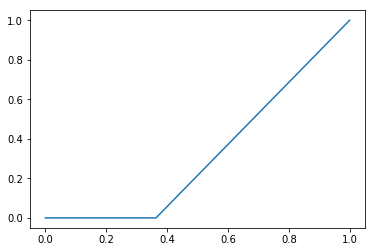

In [41]:
plt.plot(fpr, tpr)

In [43]:
pr, rc, thre = precision_recall_curve(y, c1)

In [44]:
pr, rc, thre

(array([0.01000000, 0.00000000, 1.00000000]),
 array([1.00000000, 0.00000000, 0.00000000]),
 array([0.37614006, 0.53077322]))

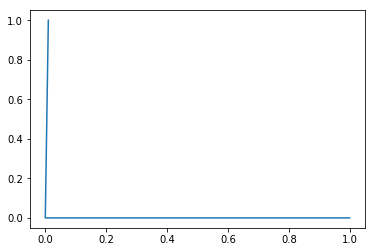

In [45]:
plt.plot(pr, rc)

In [ ]:
x, y_true = DataCreator(test[1], hdf_path_balanced)
x = x[2, :]
y_true = y_true[2, :]

In [ ]:
out = model(Variable(torch.cuda.FloatTensor(x)))

### Logistic regression

In [ ]:
print(training_acc)
print(test_acc)

In [ ]:
cnf = confusion_matrix(predicted, y)
cnf

In [ ]:
roc = roc_auc_score(y, predicted)
roc

In [ ]:
plt.imshow(cnf, extent=[0, 47, 0, 47])
plt.colorbar()

In [ ]:
x = np.array([0.9, 0.4, 0.01])
y = np.array([1,1,0])
x = Variable(torch.cuda.FloatTensor(x), requires_grad=True)
y = Variable(torch.cuda.FloatTensor(y))
out =  torch.sum(x ** 2) # torch.dot(x, y) / torch.sum(x)
print(out)
out.backward()
print(x.grad)

### Feed forward network

In [ ]:
print(training_acc)
print(test_acc)

In [ ]:
roc_ff = roc_auc_score(y, predicted)
roc_ff

In [ ]:
cnf_ff = confusion_matrix(predicted, y)

In [ ]:
cnf_ff

In [ ]:
plt.imshow(cnf_ff, extent=[0, 47, 0, 47], cmap='jet')
plt.yticks()
plt.xticks()
plt.gca().invert_yaxis()
# plt.colorbar()

## Sampling dataset
Selecting those loans which have atleast 2 statuses, ie. there has to be at least one change of status.

In [ ]:
st = time.time()
index = 0
max_size = 0
df_out = pd.DataFrame()
lookup_out = pd.DataFrame()
for t in train:
    df = pd.read_hdf(hdf_file_path, 'X_' + str(t))
    lookup = pd.read_hdf(hdf_file_path, 'lookup_' + str(t))
    df.current_status = df.current_status.astype('category', categories=config.unique_values['current_status'])
    df.state = df.state.astype('category', categories=config.unique_values['unique_states'])
    for _, l in lookup.iterrows():
        df_each = df.iloc[l[1] : l[2], :]
        if(len(df_each.current_status.unique()) > 1):
            df_out = df_out.append(df_each)
            lookup_out = lookup_out.append(l)
            max_size = max(max_size, l[2] - l[1])
            index += 1
            if((index + 1) % 3000 == 0):
                df_out.to_hdf(hdf_path_balanced, key='X_'+str(int(index/3000)), format='t', complevel=9)
                lookup_out.to_hdf(hdf_path_balanced, key='lookup_'+str(int(index/3000)), format='t', complevel=9)
                df_out = pd.DataFrame()
                lookup_out = pd.DataFrame()
print('train over')
for t in test:
    df = pd.read_hdf(hdf_file_path, 'X_' + str(t))
    lookup = pd.read_hdf(hdf_file_path, 'lookup_' + str(t))
    df.current_status = df.current_status.astype('category', categories=config.unique_values['current_status'])
    df.state = df.state.astype('category', categories=config.unique_values['unique_states'])
    for _, l in lookup.iterrows():
        df_each = df.iloc[l[1] : l[2], :]
        if(len(df_each.current_status.unique()) > 1):
            df_out = df_out.append(df_each)
            lookup_out = lookup_out.append(l)
            max_size = max(max_size, l[2] - l[1])
            index += 1
            if((index + 1) % 3000 == 0):
                df_out.to_hdf(hdf_path_balanced, key='X_'+str(int(index/3000)), format='t', complevel=9)
                lookup_out.to_hdf(hdf_path_balanced, key='lookup_'+str(int(index/3000)), format='t', complevel=9)
                df_out = pd.DataFrame()
                lookup_out = pd.DataFrame()
print('test over')
for t in valid:
    df = pd.read_hdf(hdf_file_path, 'X_' + str(t))
    lookup = pd.read_hdf(hdf_file_path, 'lookup_' + str(t))
    df.current_status = df.current_status.astype('category', categories=config.unique_values['current_status'])
    df.state = df.state.astype('category', categories=config.unique_values['unique_states'])
    for _, l in lookup.iterrows():
        df_each = df.iloc[l[1] : l[2], :]
        if(len(df_each.current_status.unique()) > 1):
            df_out = df_out.append(df_each)
            lookup_out = lookup_out.append(l)
            max_size = max(max_size, l[2] - l[1])
            index += 1
            if((index + 1) % 3000 == 0):
                df_out.to_hdf(hdf_path_balanced, key='X_'+str(int(index/3000)), format='t', complevel=9)
                lookup_out.to_hdf(hdf_path_balanced, key='lookup_'+str(int(index/3000)), format='t', complevel=9)
                df_out = pd.DataFrame()
                lookup_out = pd.DataFrame()
print('valid over')
df_out.to_hdf(hdf_path_balanced, key='X_'+str(int(index/3000)), format='t', complevel=9)
lookup_out.to_hdf(hdf_path_balanced, key='lookup_'+str(int(index/3000)), format='t', complevel=9)
et = time.time()
print('time taken: ', et - st)
print('number of dfs: ', index)
print('max size: ', max_size)

In [ ]:
67083045/67457219

In [ ]:
total = 0
zero_count = 0
for t in range(39):
    df = pd.read_hdf(hdf_path_balanced, 'X_' + str(t))
    zero_count += df[df.current_status == '0'].shape[0]
    total += df.shape[0]

In [ ]:
(zero_count, total)

In [ ]:
3398280/3772454